In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

In [44]:
mush = pd.read_csv('mushrooms.csv')
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### EDA and data-preprocessing

In [45]:
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [46]:
def bar_chart(feature):
    sb.set_style('whitegrid')
    poisonous = mush[mush['class'] == 'p'][feature].value_counts()
    edible = mush[mush['class'] == 'e'][feature].value_counts()
    df = pd.DataFrame([poisonous,edible])
    df.index = ['poisonous','edible']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))
    

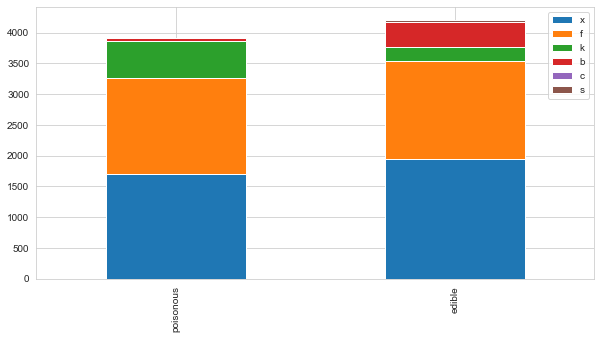

In [47]:
bar_chart('cap-shape')

In [48]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [49]:
x =  mush.drop(['class'], 1)
y =  mush['class']

In [50]:
encoder = OneHotEncoder(sparse = False)

In [51]:
x_en = encoder.fit_transform(x)

In [52]:
x_en.shape

(8124, 117)

In [53]:
encoder.get_feature_names(x.columns)

array(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c',
       'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p',
       'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y',
       'bruises_f', 'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l',
       'odor_m', 'odor_n', 'odor_p', 'odor_s', 'odor_y',
       'gill-attachment_a', 'gill-attachment_f', 'gill-spacing_c',
       'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b',
       'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k',
       'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r',
       'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_e',
       'stalk-shape_t', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f',
       'stalk-surface-above-ring_k

In [54]:
x_en = pd.DataFrame(x_en, columns = encoder.get_feature_names(x.columns) )

In [55]:
x_en.shape

(8124, 117)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_en , y,
                                                   test_size = 0.3, random_state = 42)

In [57]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((5686, 117), (2438, 117), (5686,), (2438,))

In [58]:
selector = SelectKBest(chi2, k = 20).fit(x_train, y_train)

In [59]:
selector = pd.DataFrame(dict(Feature = list(x_train.columns), Scores = selector.scores_))

selector.sort_values(by = 'Scores', ascending = False ).head(30)

,Feature,Scores
27,odor_n,2010.768674
24,odor_f,1636.806947
57,stalk-surface-above-ring_k,1430.104897
61,stalk-surface-below-ring_k,1352.982930
37,gill-color_b,1312.035101
36,gill-size_n,1165.836625
96,spore-print-color_h,1083.148644
92,ring-type_l,974.315539
21,bruises_t,861.664698
94,ring-type_p,856.632941


In [60]:
# keeping features with scores above threshold score.
threshold = 520
selected_features = selector[selector.Scores > threshold]
selected_features.sort_values(by = 'Scores', ascending = False )

,Feature,Scores
27,odor_n,2010.768674
24,odor_f,1636.806947
57,stalk-surface-above-ring_k,1430.104897
61,stalk-surface-below-ring_k,1352.982930
37,gill-color_b,1312.035101
36,gill-size_n,1165.836625
96,spore-print-color_h,1083.148644
92,ring-type_l,974.315539
21,bruises_t,861.664698
94,ring-type_p,856.632941


In [61]:
print('no. of selected features:', len(selected_features))

no. of selected features: 16


In [62]:
# selecting highest scoring features for train and test set.
x_train_red = x_train[list(selected_features['Feature'])]
x_test_red = x_test[list(selected_features['Feature'])]

In [63]:
x_train_red.shape, x_test_red.shape

((5686, 16), (2438, 16))

In [64]:
k = KFold(n_splits = 10, shuffle = True, random_state = 42)

###  Base Model Evaluation

model: RandomForestClassifier(random_state=42)
CV score:1.0
score_std: 0.0
----------
model: LogisticRegression()
CV score:0.978366110547291
score_std: 0.004988056327973975
----------
model: SVC()
CV score:1.0
score_std: 0.0
----------
model: AdaBoostClassifier()
CV score:0.9664054184509518
score_std: 0.006716088602079917
----------
model: GradientBoostingClassifier(random_state=42)
CV score:0.9992967028886854
score_std: 0.001166053423786785
----------
model: KNeighborsClassifier()
CV score:1.0
score_std: 0.0
----------
model: XGBClassifier()
CV score:0.9968350082922843
score_std: 0.0031244950654722627
----------
model: GaussianNB()
CV score:0.9248960370306195
score_std: 0.017140412939565315
----------


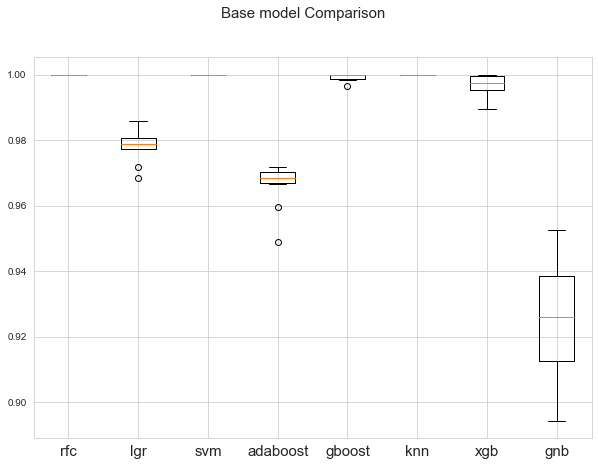

In [65]:
rfc = RandomForestClassifier(random_state = 42)
lgr = LogisticRegression()
svm = SVC()
adaboost =  AdaBoostClassifier()
gboost = GradientBoostingClassifier(random_state = 42)
knn = KNeighborsClassifier()
xgb = xgboost.XGBClassifier()
gnb = GaussianNB()
models = [rfc, lgr, svm, adaboost, gboost, knn, xgb, gnb]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train_red, y_train, cv = k, scoring = 'accuracy', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 15)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfc', 'lgr','svm', 'adaboost', 'gboost', 'knn', 'xgb', 'gnb'],
                  fontsize = 15)
fig.set_size_inches(10,7)
plt.show() 

### Hyper-parameter tuning

In [66]:
param_svm = dict(kernel = ['rbf','poly','sigmoid','linear'], gamma = np.arange(0.25,3,0.25), degree = [2,3,4,5],
             C =np.logspace(4,-4,60))

param_rfc = dict(n_estimators = [10,15,20,25,30], criterion = ['gini', 'entropy'],
                max_depth = [3,4,5,6,7,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3], random_state = [41,42,43])

param_knn = dict(n_neighbors = np.arange(1,101,1), algorithm = ['auto','ball_tree','kd_tree','brute'],
                leaf_size = [25,30,35], p = [1,2], weights = ['uniform','distance'])

In [67]:
model_param_list = [(rfc,param_rfc), (svm,param_svm) ,(knn,param_knn)]

In [69]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    r_searchcv = RandomizedSearchCV(model, param, cv = k, n_jobs = -1, scoring = 'accuracy',
                                   random_state = 42)
    r_searchcv.fit(x_train_red, y_train.values.ravel())
    best_cvscore = r_searchcv.best_score_
    best_param = r_searchcv.best_params_
    best_estimator = r_searchcv.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
print('best_estimators:',best_estimator_list)

model: RandomForestClassifier(random_state=42)
best_cvscore: 0.9917321592118616
best_param: {'random_state': 42, 'n_estimators': 15, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 7, 'criterion': 'entropy'}


model: SVC()
best_cvscore: 1.0
best_param: {'kernel': 'rbf', 'gamma': 1.75, 'degree': 5, 'C': 2868.3168133420118}


model: KNeighborsClassifier()
best_cvscore: 1.0
best_param: {'weights': 'distance', 'p': 2, 'n_neighbors': 93, 'leaf_size': 30, 'algorithm': 'kd_tree'}


best_estimators: [RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=15, random_state=42), SVC(C=2868.3168133420118, degree=5, gamma=1.75), KNeighborsClassifier(algorithm='kd_tree', n_neighbors=93, weights='distance')]
Wall time: 6.55 s


### Testing

In [70]:
for model in best_estimator_list:
    model.fit(x_train_red, y_train.values.ravel())
    y_pred = model.predict(x_train_red)
    score = accuracy_score(y_train, y_pred)
    print('model',model)
    print('accuracy %:', score*100)
    print('\n')


model RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=15, random_state=42)
accuracy %: 99.13823425958495


model SVC(C=2868.3168133420118, degree=5, gamma=1.75)
accuracy %: 100.0


model KNeighborsClassifier(algorithm='kd_tree', n_neighbors=93, weights='distance')
accuracy %: 100.0




In [71]:
for model in best_estimator_list:
    model.fit(x_train_red, y_train.values.ravel())
    y_pred = model.predict(x_test_red)
    score = accuracy_score(y_test, y_pred)
    print('model',model)
    print('accuracy %:', score*100)
    print('\n')


model RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=15, random_state=42)
accuracy %: 99.05660377358491


model SVC(C=2868.3168133420118, degree=5, gamma=1.75)
accuracy %: 100.0


model KNeighborsClassifier(algorithm='kd_tree', n_neighbors=93, weights='distance')
accuracy %: 100.0


